In [3]:
import math
import matplotlib.pyplot as plt
import torch

In [163]:
def positionalencoding(d_model, length):
    if d_model % 2 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dim (got dim={:d})".format(d_model))
    pe = torch.zeros(length, d_model)
    position = torch.arange(0, length).unsqueeze(1)
    div_term = torch.Tensor([(2*math.pi)/1000])
    # div_term = torch.exp((torch.arange(0, d_model, 2, dtype=torch.float) *
    #                      -(math.log(10000.0) / d_model)))
    pe[:, 0::2] = torch.sin(position.float() * div_term)
    pe[:, 1::2] = torch.cos(position.float() * div_term)

    return pe


positions = torch.arange(0, 1000)
pos_encoding = positionalencoding(2, 1000)


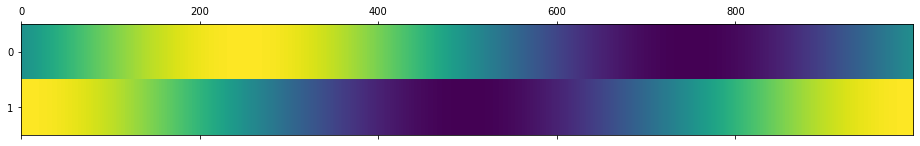

In [164]:
plt.matshow(pos_encoding.T, aspect='auto')

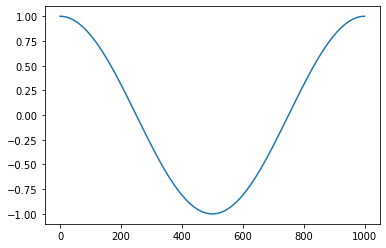

In [165]:
plt.plot(positions, (pos_encoding[[0], :] @ pos_encoding.T)[0]) 

In [166]:
def build_random_matrix(n_row_col):
    return torch.normal(torch.zeros(n_row_col, n_row_col))

Wk = build_random_matrix(2)

In [167]:
def build_Wq(Wk, alpha, beta):
    return ((alpha * torch.diag_embed(torch.ones(Wk.shape[0])) + beta * torch.Tensor([[0., 1.], [-1., 0.]])) @ Wk.inverse()).T

In [168]:
Wq = build_Wq(Wk, 1, 0)
Wq

tensor([[-0.0492,  0.7036],
        [ 1.0093, -0.5420]])

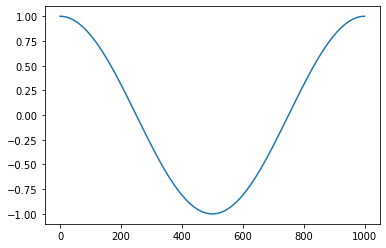

In [169]:
res = (pos_encoding[[0]] @ Wk) @ (pos_encoding @ Wq).T
plt.plot(res[0])

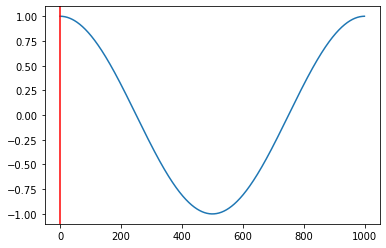

In [170]:
def visualize_setting(alpha, beta, ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    Wq = build_Wq(Wk, alpha, beta)
    attention = (pos_encoding[[0]] @ Wk) @ (pos_encoding @ Wq).T
    ax.plot(attention[0])
    maximum = torch.argmax(attention[0])
    ax.axvline(positions[maximum], c='r')

visualize_setting(1, 0)

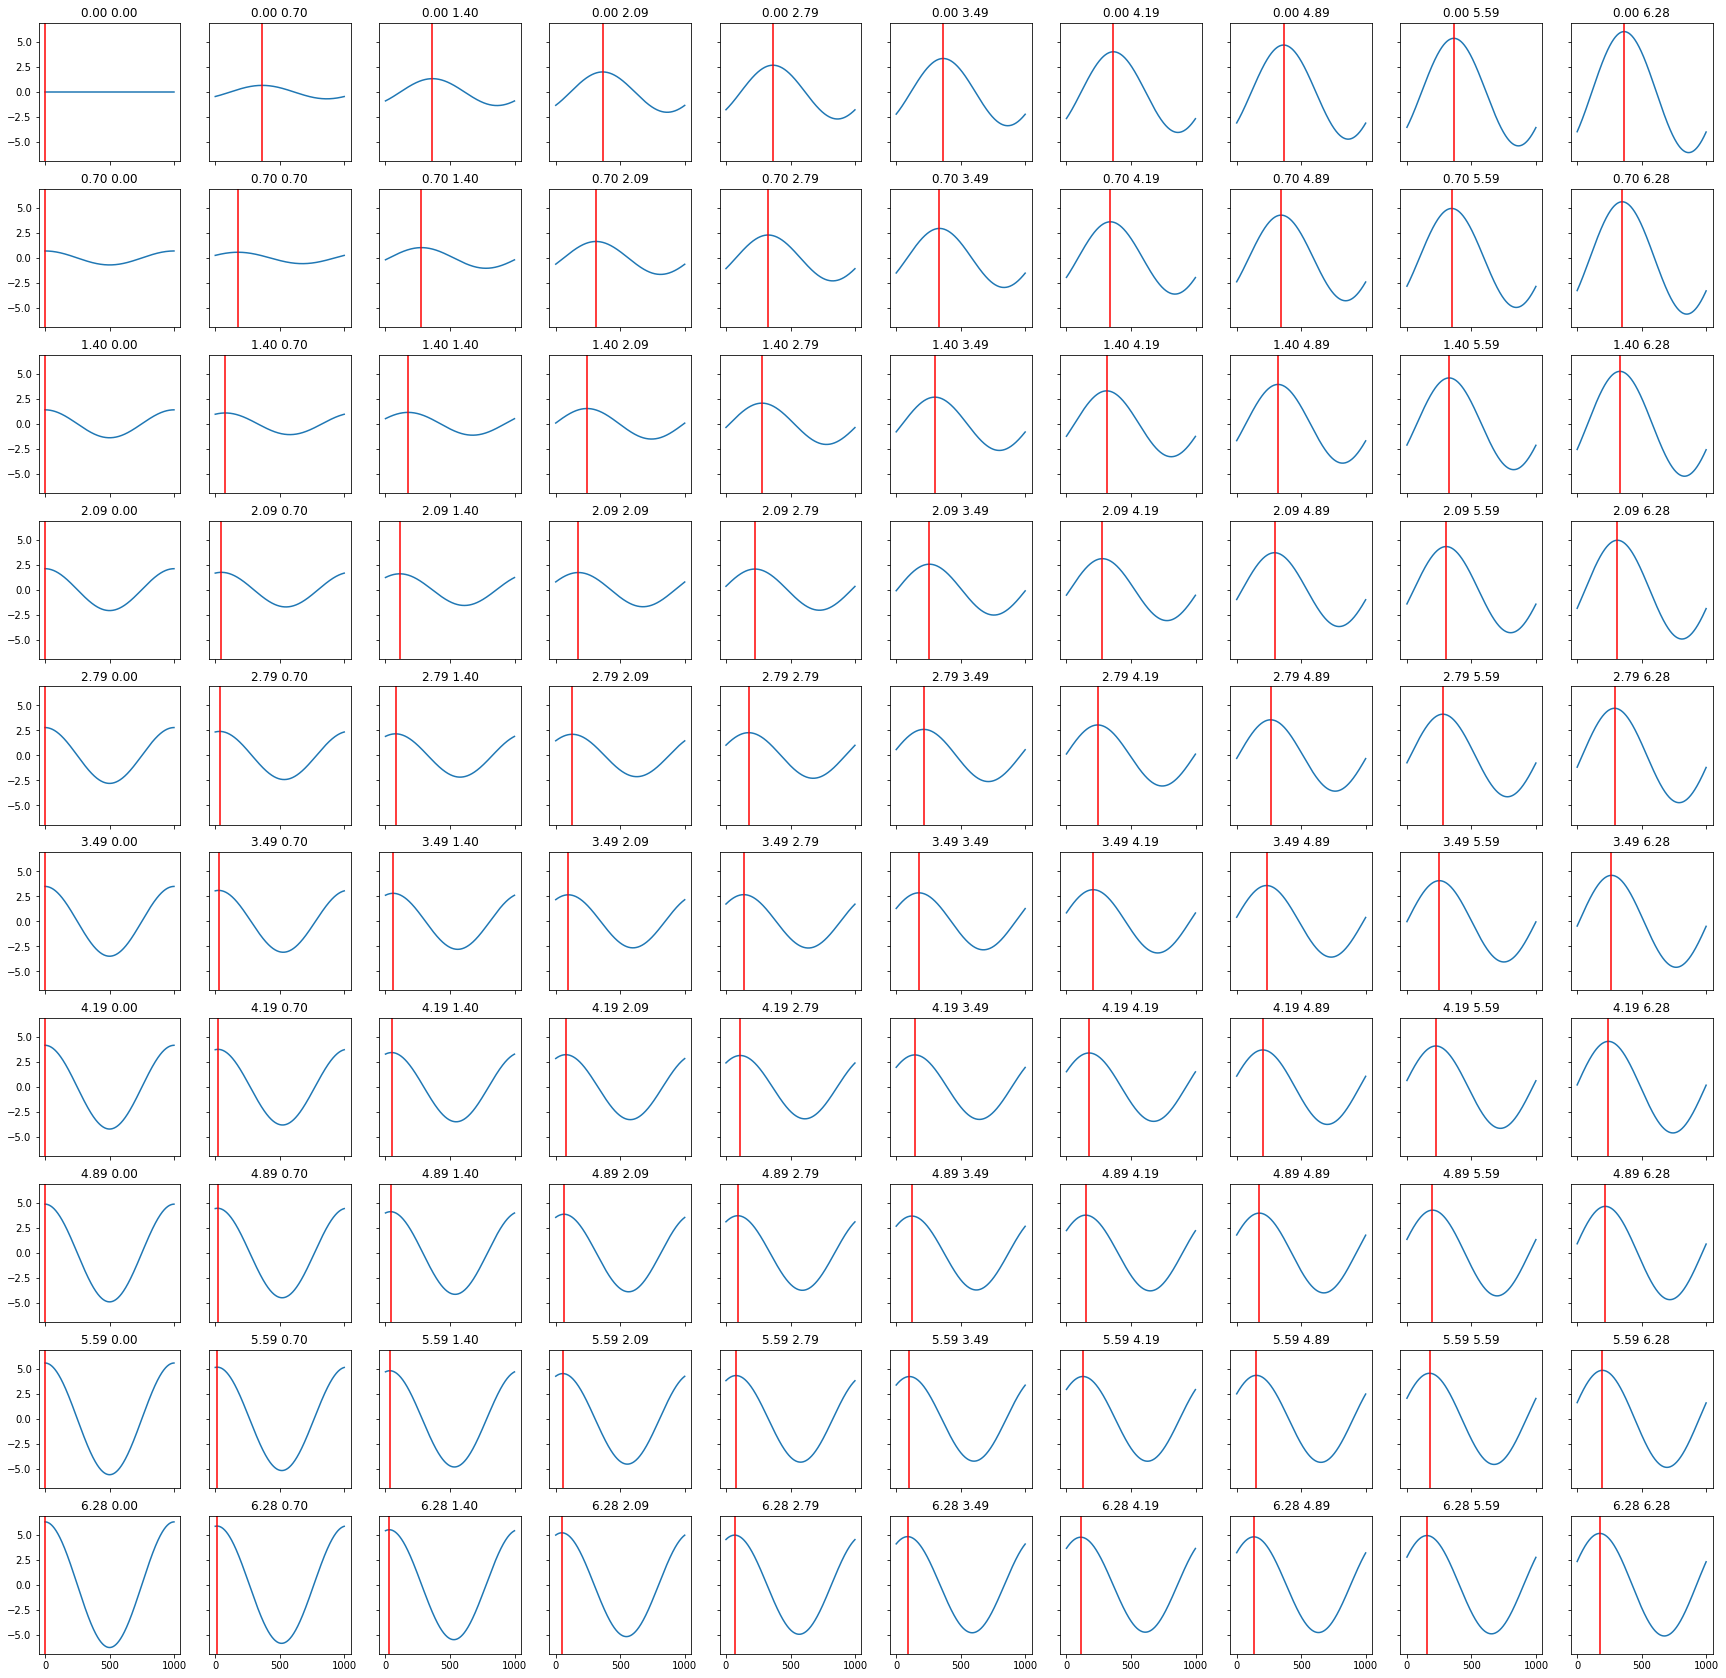

In [171]:
min_a, max_a = 0., 2*math.pi
n_a = 10
min_b, max_b = 0, 2*math.pi
n_b = 10
fig, axs = plt.subplots(n_a, n_b, figsize=(n_b*3, n_a*3), sharex=True, sharey=True)
for row, alpha in zip(axs, torch.linspace(min_a, max_a, n_a)):
    for ax, beta in zip(row, torch.linspace(min_b, max_b, n_b)):
        ax.set_title('{:.2f} {:.2f}'.format(alpha, beta))
        visualize_setting(alpha, beta, ax=ax)